# Climate Change Belief Analysis


by Classification_JS1_DSFT21

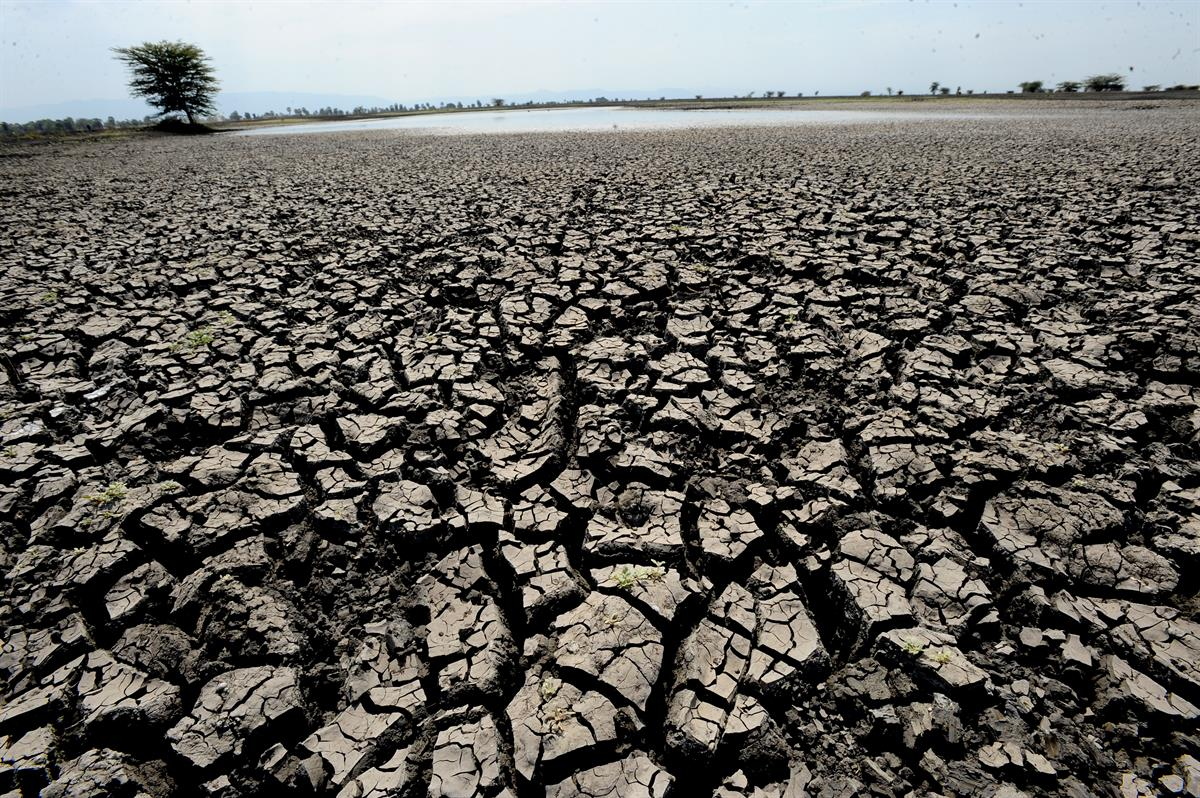

# Introduction 
Several companies are built around lessening one’s environmental impact or carbon footprint. This is because they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This model together will the accompanying app will help Geo-Environmental Consultation companies who are turning to social media to obtain valuable information about job applicants and to monitor the activities of their employees in relation to the values they have towards the company's projects and beliefs surrounding the ever changing global environment.

Providing an accurate and robust solution to this task will provide access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. The app launched on **streamlit** is also an intuitive, easy to use, simple and the customer can rely on the product it.

Authors: John Bosman, Kabelo Mbewe, Khwatsi Hlungwani, Reneilwe Mphahlele, Tshegofatso Letlape and Mathew van Wyk

# Table of Contents

1. Intro to Comet
2. Importing Libraries
3. Importing Dataset
4. Data Preprocessing
5. Exploratory Data Analysis:
6. Modelling
7. Submission
8. Conclusion

### Comet

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of the experiements- allowing for reproducing of results, or going back to a previous version of the experiment.

In [1]:
pip install comet_ml

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading in the comet_ml tool
from comet_ml import Experiment
    
# Setting the API key, saved as environment variable 
experiment = Experiment(api_key="QekXFT3JOd007MeNaSyzC5AH1",
        project_name="climate-change-belief-analysis", workspace="mathew-van-wyk")
experiment.display()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mathew-van-wyk/climate-change-belief-analysis/86a88fd78c2645429fec45fca4585a39



# 2. Importing Libraries

In [3]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification
from imblearn.under_sampling import InstanceHardnessThreshold

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics




# 3. Importing dataset

In [4]:
# Loading in the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

# 4. Data Preprocessing

## Summary Statistics

In [5]:
# Looking at the predicted output
sample_submission.head()

tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1
4   872928          1

In [6]:
# Looking at the first few entries in the dataset
train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [7]:
# Shape of the dataset
train.shape

(15819, 3)

In [8]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
# Looking at the numbers of possible classes in our sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

The tweets sentiments are divided into four (4) classes:

*  [ 2 ] - News: tweets links to factual news about climate change
*  [ 1 ] - Pro: tweets that supports the belief of man-made climate change
*  [ 0 ] - Neutral: tweets that neither support nor refutes the belief of man-made climate change
*  [-1 ] - Anti (Negative): tweets that does not believe in man-made climate change

In [10]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

## Missing values

In [11]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Fortunately, there are no missing values in our dataset.

In [12]:
# Checking whether a character is white-space character or not
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


In [13]:
# Sample tweet
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R


Text(0.5, 1.0, 'Distribution of target labels')

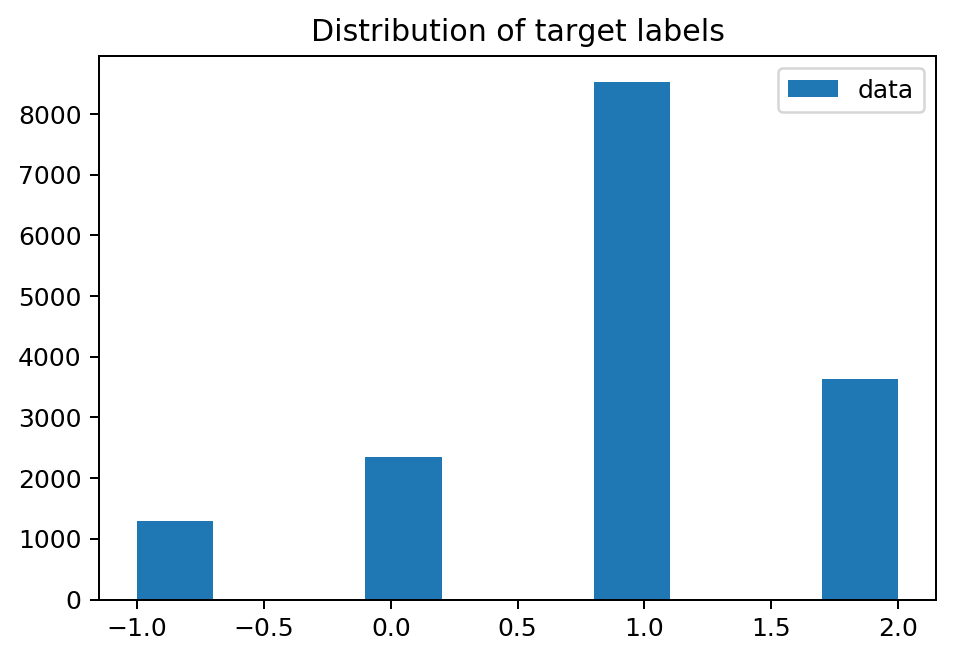

In [14]:
# Visualizing the distribution of the target 
plt.hist(train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

It is notable that there is an imbalance of classes in the daset and these tend to be a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. This can cause problems as most algorithms are designed to maximize accuracy and reduce error. Therefore we will address and take care of the class imbalance in our EDA

Text(0, 0.5, 'Density')

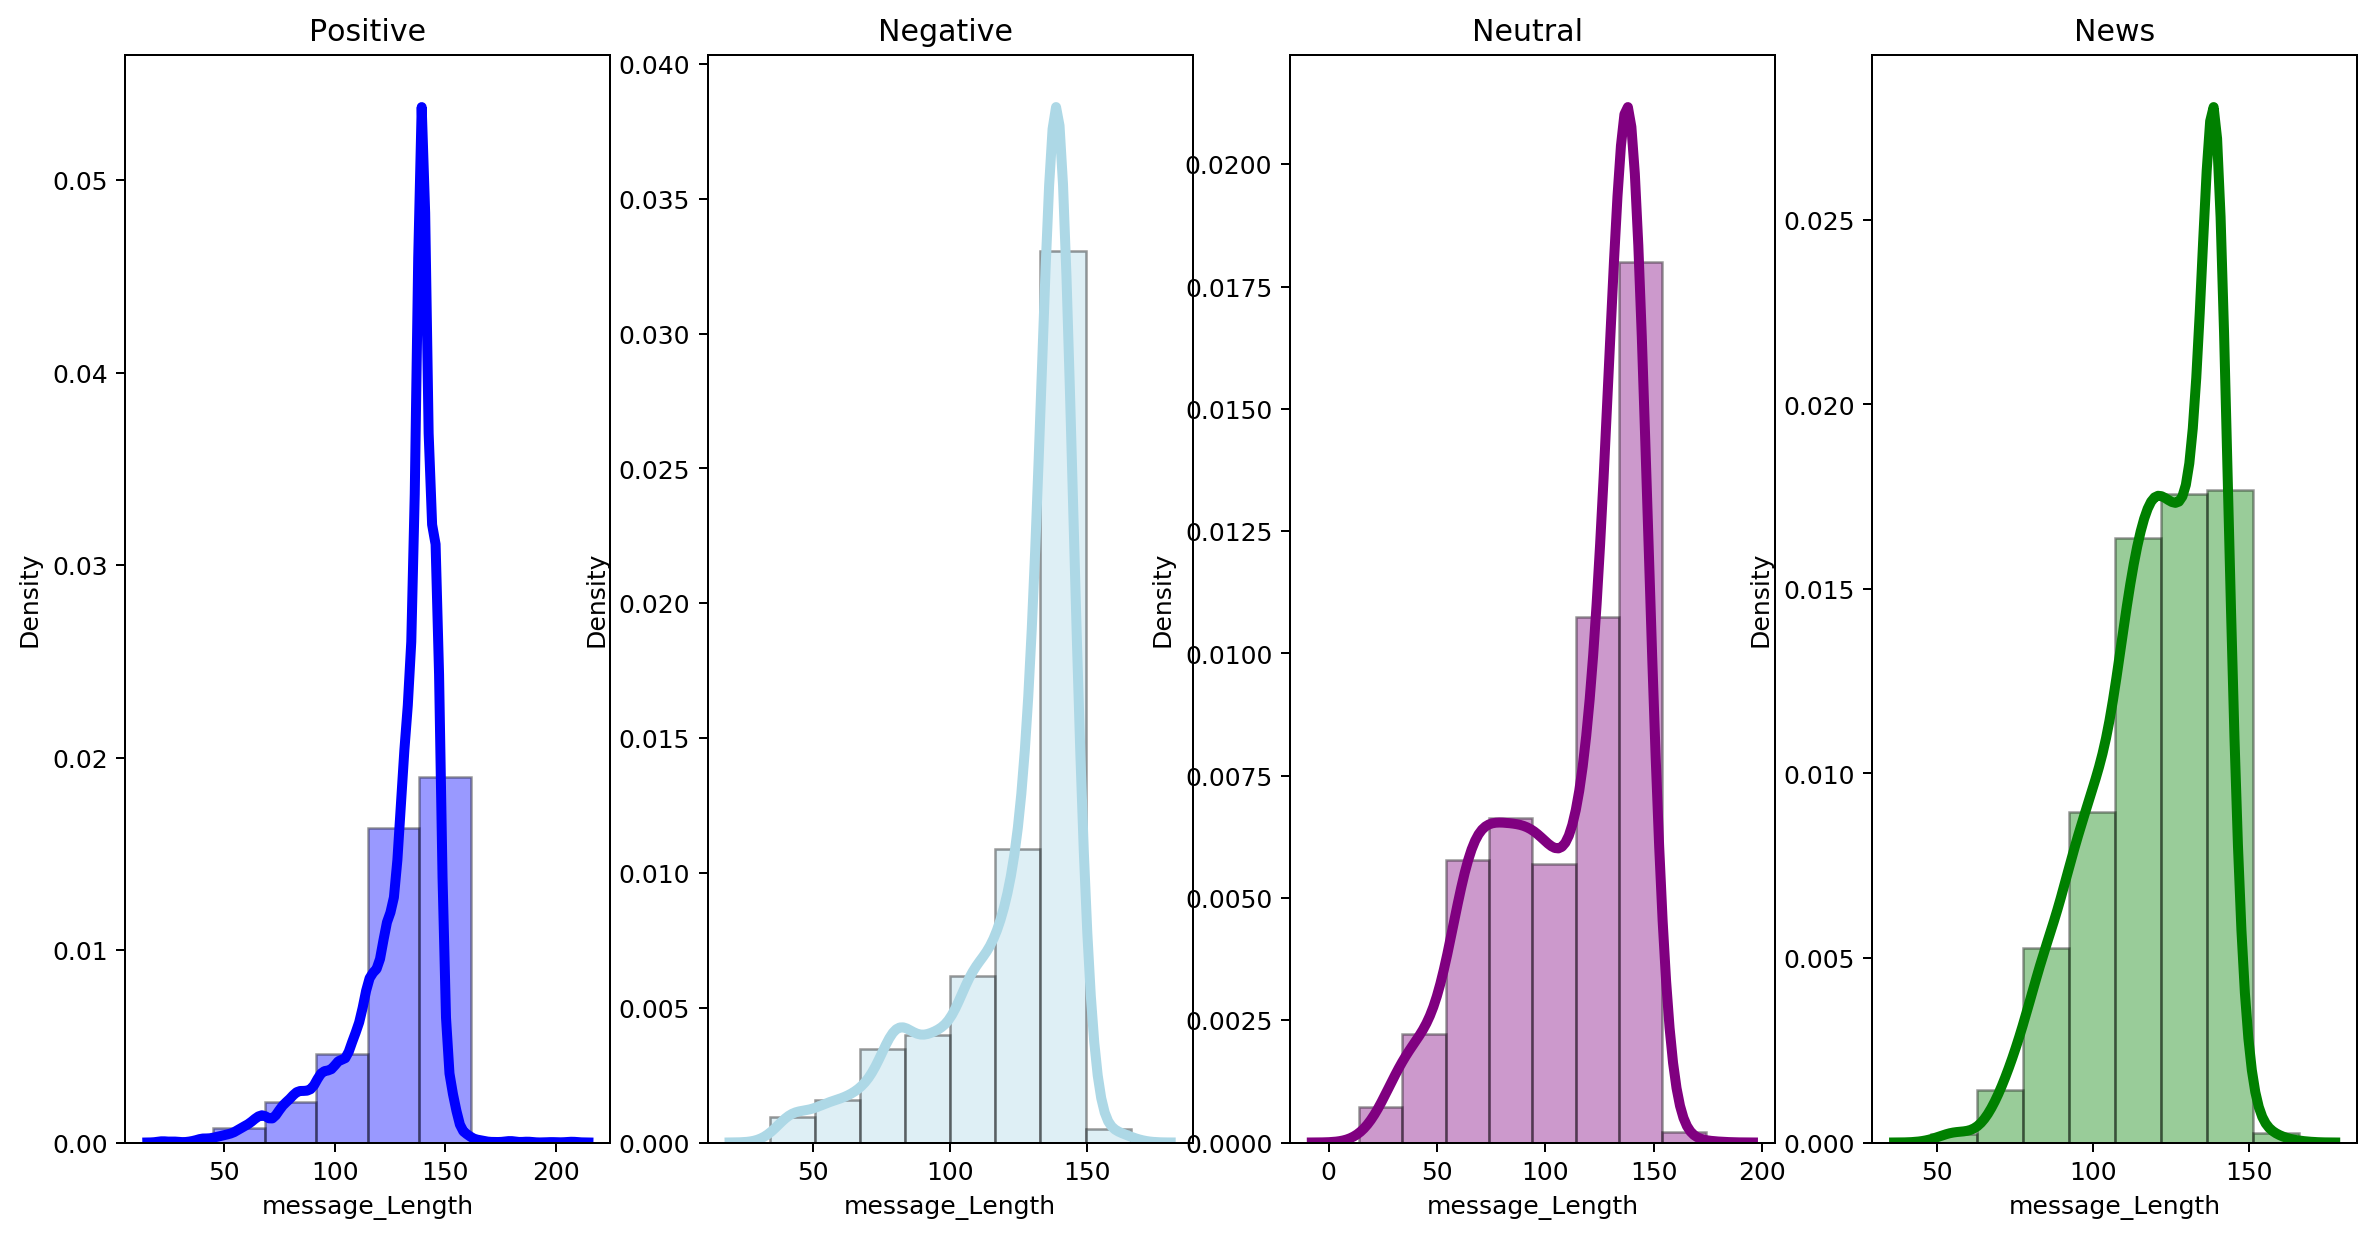

In [15]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For News
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. However, the density contrast between positive and negative sentiments is interesting and will make for more unpacking later in the EDA. 
Now that we have explored our dataset, we can begin perfoming some analyses on it.

# 5. Exploratory Data Analysis

We perform investigative and detective analysis of our data to see if we can unearth any insights.

## 5.1 Data Visualisation

In [16]:
#Making copy of train dataset
working_df = train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

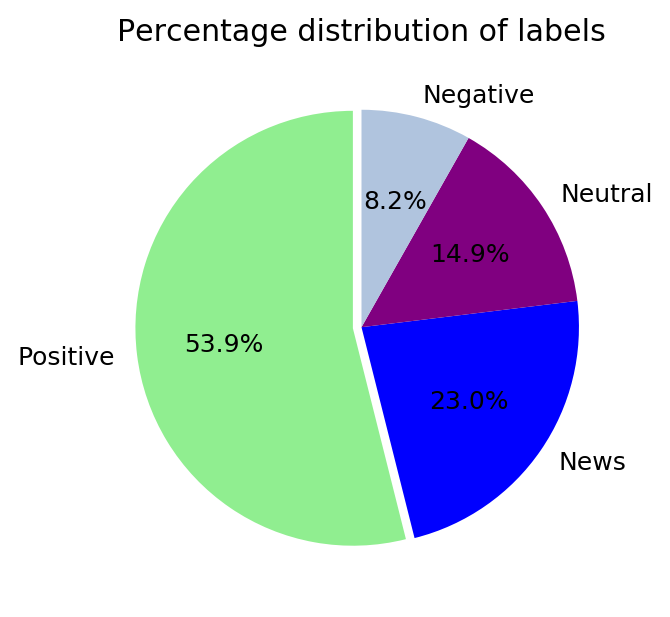

In [17]:
# checking the numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.title('Percentage distribution of labels')
plt.show()

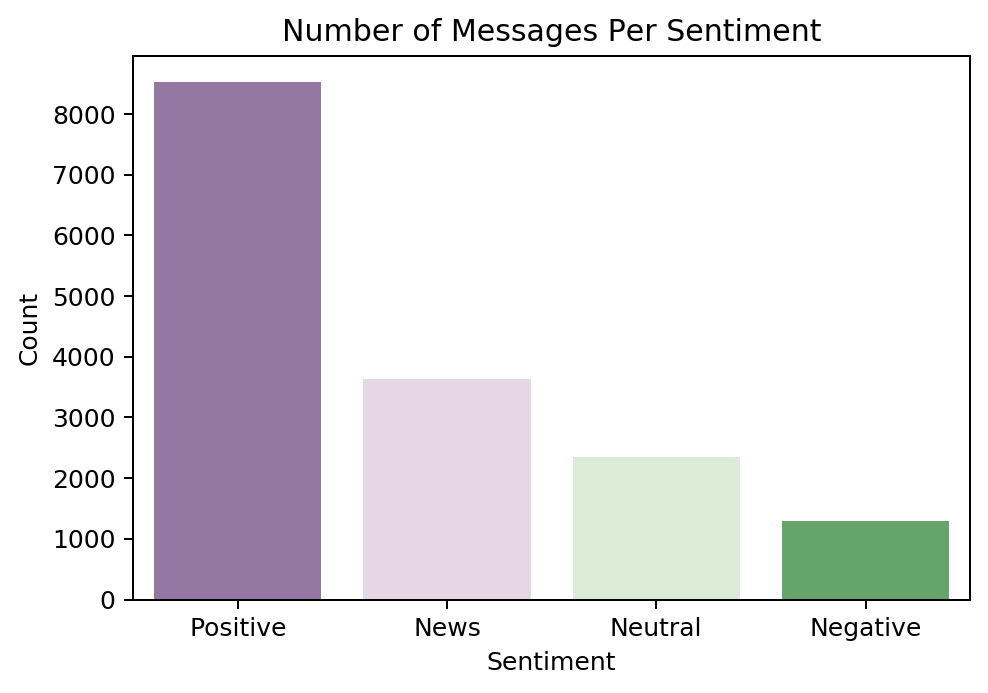

In [18]:
sns.countplot(x='sentiment' ,data = working_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier, there is an imbalance of classes in the dataset, with:
* positive tweets on climate change having the most number of tweets at 53.9% of our dataset. 
* tweets against climate change having the least number of counts (8.2%). 

As such this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

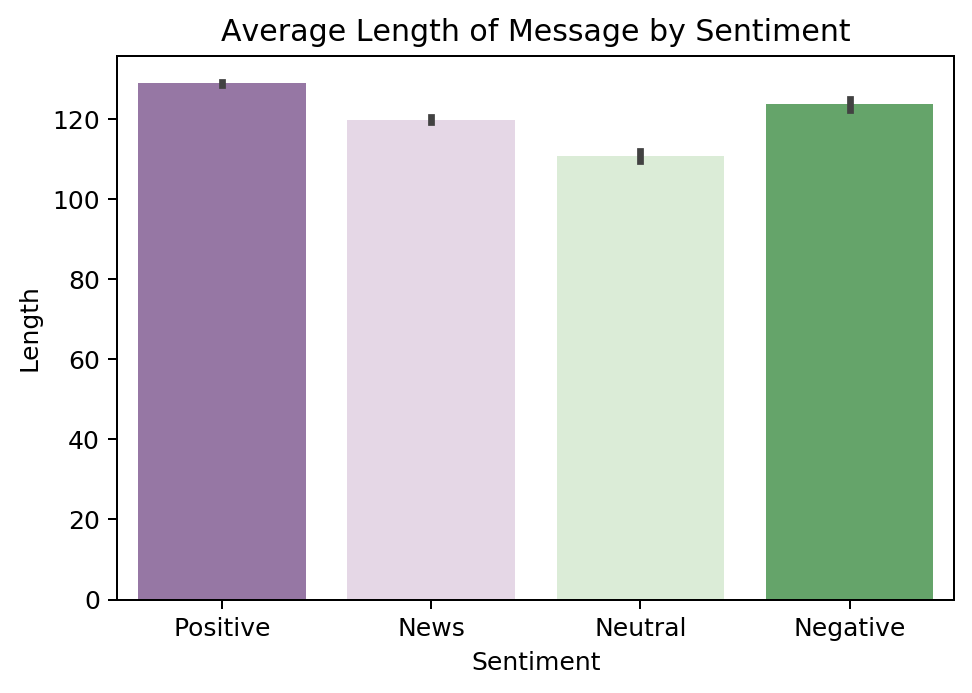

In [19]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

The average text length of tweets is rather about equal with each sentiment 

In [20]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

In [21]:
# Generating Counts of users
counts = working_df[['message',
                     'users']].groupby('users',
                                       as_index=False).count().sort_values(by='message', ascending=False)

In [22]:
# Top 5 most popular
counts.head()

users  message
3410  @StephenSchlegel      307
3270       @SenSanders      243
6182  @realDonaldTrump      143
448     @BernieSanders      121
612               @CNN      106

Stephen Schlegel had the most number of tweets.

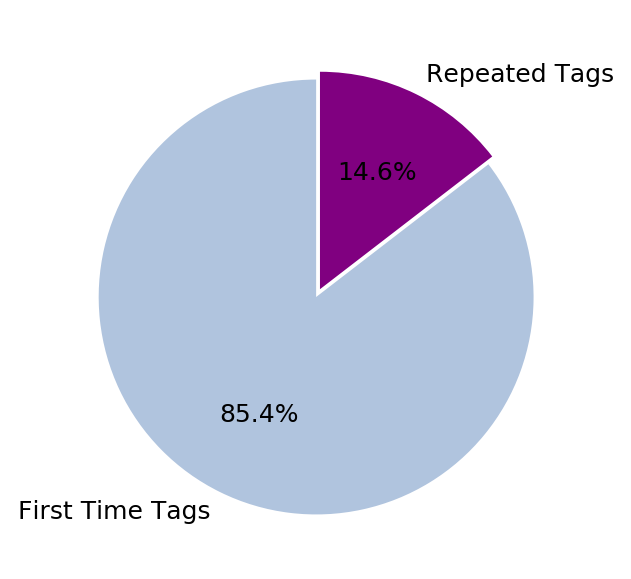

In [23]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']),
          sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

In [24]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


In [25]:
first_time_tags = round(sum(np.array(counts['message']) == 1)*100/len(counts['message']), 1)
print(f"{first_time_tags} percent of the data are from first time tags")

85.4 percent of the data are from first time tags


In [26]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='PRGn',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()

#### Now that we have had a look at the tweets themselves as well as the users, we now analyse the hastags:

In [27]:
# Analysis of most popular tags, sorted by popularity
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.show()

In [28]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.show()

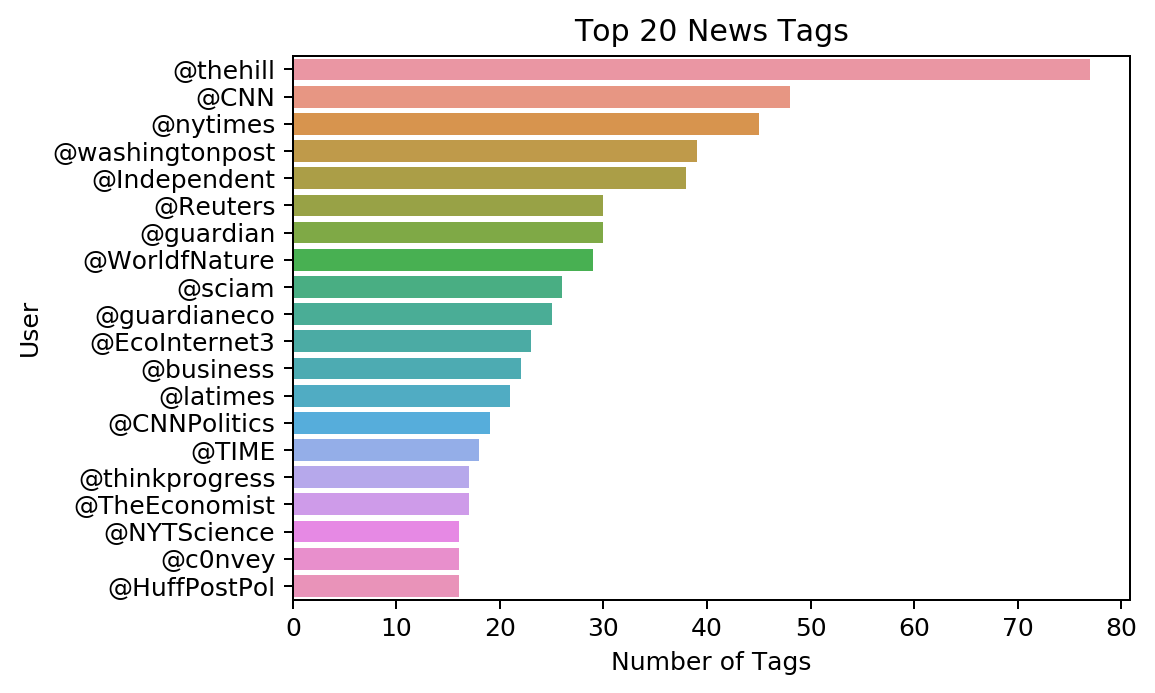

In [29]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.show()

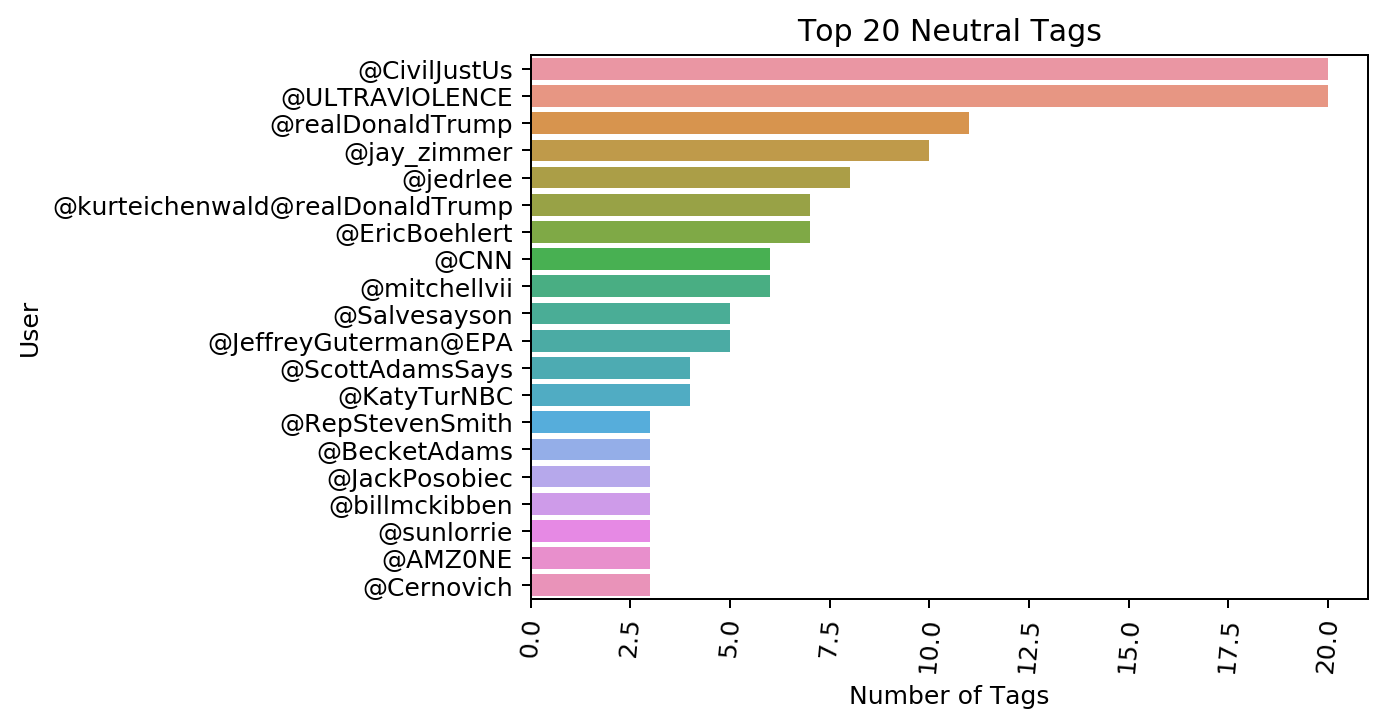

In [30]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Neutral'],
              order=working_df[working_df['sentiment'] == 'Neutral'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Neutral Tags')
plt.xticks(rotation=85)
plt.show()

Comments:
* We can notice from the graphs that Stephen Schlegel had the most number of tags and of positive tags, with reagrd to climate change.
* The most number of negative tags were from Donald Trump, at over 50 tags.
* The most number of news tags were from The Hill news, at over 70 tags.
* Ultra Violence had the most number of neutral tags of over 19 tags 
* Donald Trump was the user that appeared in almost all the sentiments, with his username appearing in positive tags(over 50 tags), negative tags(over 50 tags) and neutral tags(over 10 tags).

## 5.2. Data Cleaning

In [31]:
# We define a function cleaner that will bring all letters to lower case, we tokenize, normalize text and remove stopwords
def cleaner(line):

    # Removes RT, url and trailing white spaces
    line = re.sub(r'^RT ','', re.sub(r'https://t.co/\w+', '', line).strip()) 

    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # removes emoticons,
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    line = emojis.sub(r'', line)

    
    # Removes puctuation
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    message = punctuation.sub("", line.lower()) 

    # Removes stopwords
    nlp_for_stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    message = nlp_for_stopwords.process(message) # This will remove stops words that are not necessary. The idea is to keep words like [is, not, was]
    # https://towardsdatascience.com/why-you-should-avoid-removing-stopwords-aa7a353d2a52
    # print("After removing stopwords:\n", message, '\n'*2)

    # tokenisation
    # We used the split method instead of the word_tokenise library because our message is already clean at this point
    # and the twitter data is not complicated
    message = message.split() 

    # POS 
    # Part of Speech tagging is essential to ensure Lemmatization perfoms well.
    pos = pos_tag(message)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    message = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) 
                      if (po[0].lower() in ['n', 'r', 'v', 'a'] and word[0] != '@') else word for word, po in pos])

    return message

In [32]:

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)


#### The following codes seperate sentiments to create word clouds to the most common words associated with each type of opinion:

In [33]:
df_pos = train.loc[train['sentiment'] == 1] #positive reviews
df_neg = train.loc[train['sentiment'] == -1] #negative reviews
df_neu = train.loc[train['sentiment'] == 0] #neutral reviews
df_new = train.loc[train['sentiment'] == 2] #news reviews

In [34]:
pos_string = df_pos['message'].str.cat(sep = ' ')
neg_string = df_neg['message'].str.cat(sep = ' ')
neu_string = df_neu['message'].str.cat(sep = ' ')
new_string = df_new['message'].str.cat(sep = ' ')

## 5.3. WordClouds

WordCloud is a visual representation of text data used to display keywords, with the most common keywords diplayed boldly or in larger fonts.

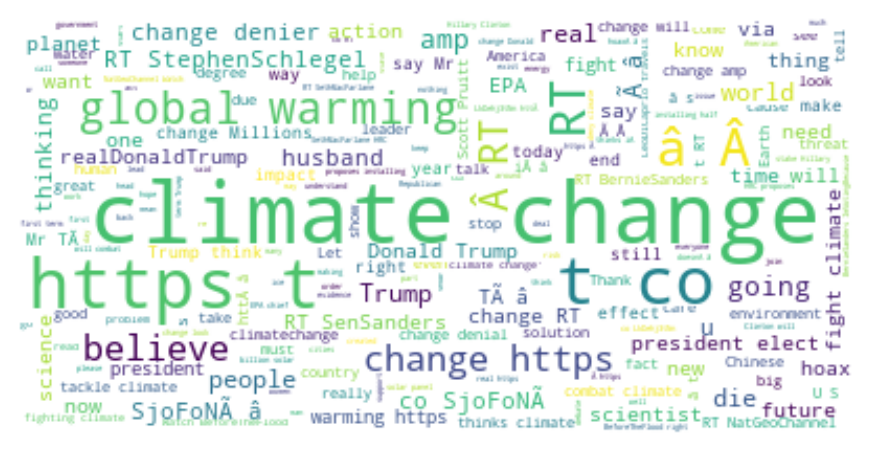

In [35]:
#Positive WordCloud:
pos_cloud = WordCloud(background_color='white').generate(pos_string) #creating and generating word cloud image 
plt.imshow(pos_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

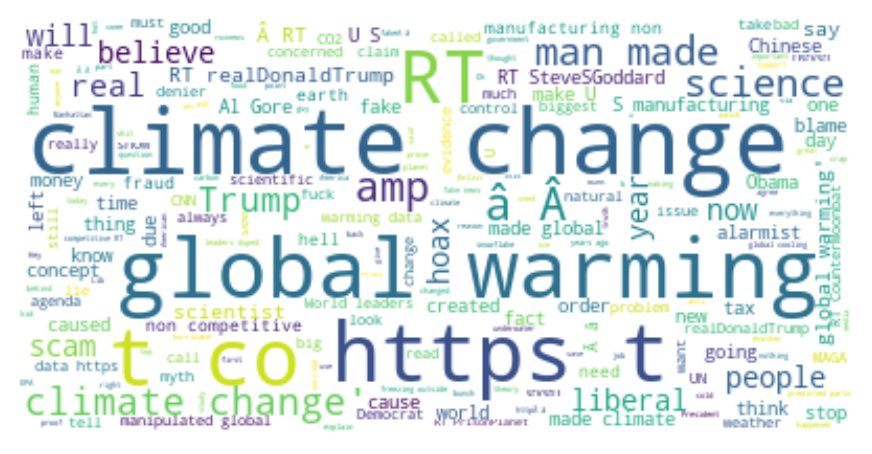

In [36]:
#Negative WordCloud
neg_cloud = WordCloud(background_color='white').generate(neg_string) #creating and generating word cloud image 
plt.imshow(neg_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

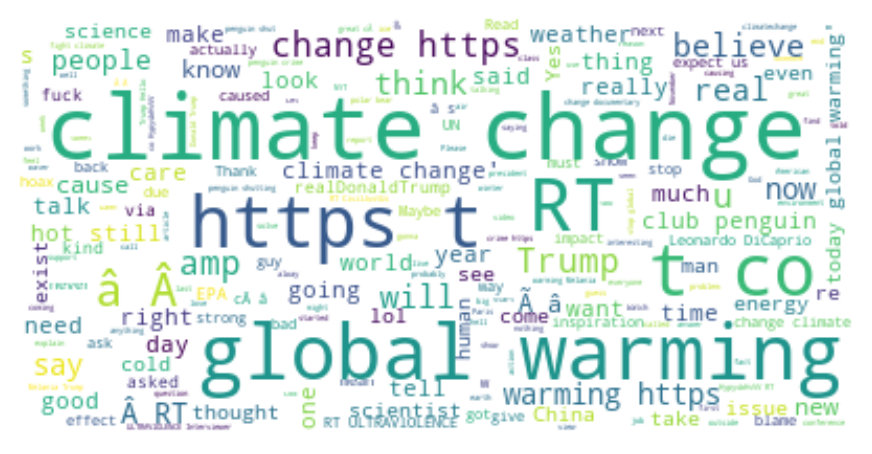

In [37]:
# Neutral WordCloud
neu_cloud = WordCloud(background_color='white').generate(neu_string) #creating and generating word cloud image 
plt.imshow(neu_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

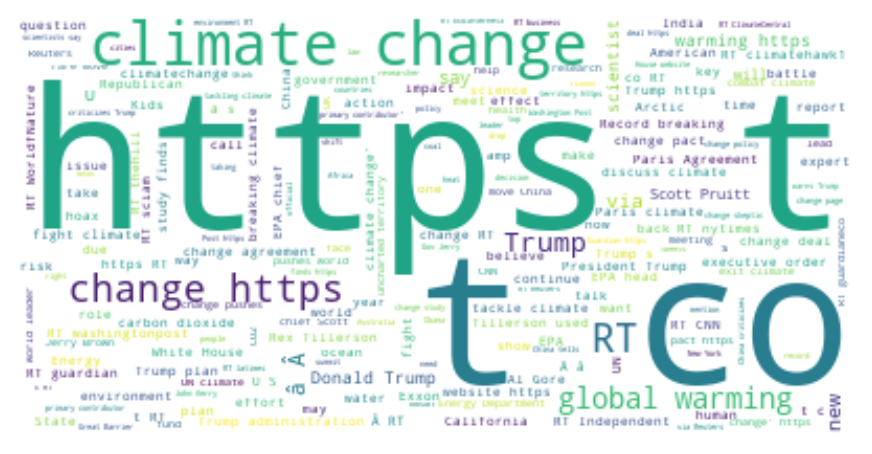

In [38]:
# News WordCloud
new_cloud = WordCloud(background_color='white').generate(new_string) #creating and generating word cloud image 
plt.imshow(new_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

Comments:
* The wordclouds above seem to have common texts used among all the sentiments
*The most common texts used include climate Change, https, global warming, RT and t co.
    

## 5.4. Feature Engineering and Selection

In [39]:
# Splitting out X (indepedent) and Y (target/dependent) variables
X_res = train['message']
y_res = train['sentiment']

In [40]:
# Splitting of Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.01, random_state=42)

# 6. Modelling

## 6.1. Setting up Classifiers for Model Training

In [41]:
# List all the models

classifiers = [LinearSVC(random_state=42),
                SVC(),
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=100, max_depth=2,
                                     random_state=0, class_weight="balanced"),
                MLPClassifier(alpha=1e-5,
                             hidden_layer_sizes=(5, 2),
                             random_state=42),
                LogisticRegression(random_state=5,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1
                                  ),
                KNeighborsClassifier(n_neighbors=5),
                MultinomialNB(),
                ComplementNB(),
                SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None)
               ]


## 6.2. Model Building

In [42]:
# Creating Function for Model Building

def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers
    and both the train and validation sets
    and return a summary of F1-score and
    processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
             datatype: series
    y_train: dependent variable for training
             datatype: series
    X_val: independent variable for validation
           datatype: series
    y_val: dependent variable for validation
           datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                   datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                       max_df=0.95,
                                                       ngram_range=(1, 2),
                                                       analyzer='word')),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')


In [43]:
# Execution of the Classifiers

classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df

COMET ERROR: Failed to extract parameters from estimator


F1-Macro  F1-Accuracy  F1-Weighted  Execution Time
LinearSVC               0.744533     0.798742     0.792909        3.520707
ComplementNB            0.667822     0.761006     0.743122        2.413442
KNeighborsClassifier    0.666610     0.698113     0.700713        2.287956
SVC                     0.655616     0.761006     0.736107      229.352163
LogisticRegression      0.632623     0.767296     0.738822        6.235826
DecisionTreeClassifier  0.622965     0.672956     0.671010       15.263534
SGDClassifier           0.440210     0.672956     0.609118        2.791672
MultinomialNB           0.437151     0.691824     0.613552        1.834652
RandomForestClassifier  0.434013     0.490566     0.497120        2.783635
MLPClassifier           0.383137     0.679245     0.589662      228.318700

In [44]:
# building and fitting the vectorizer
df_train = train.copy()
vect = TfidfVectorizer(ngram_range=(1,3), sublinear_tf=True, smooth_idf = True, min_df = 1, max_df = 0.95) 
                       
# transforming the 'clean_txt' column
X_clean_txt = vect.fit_transform(df_train.message) 

In [45]:
# Use these values for 'X' and 'y' in 'train_test_split':
y = df_train['sentiment']
X = df_train['message']

In [46]:
# Splitting the previously defined features and label of your dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean_txt, y, test_size=0.2, random_state=42)

####  Over_sampling our Dataset

In [47]:
# Over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train2, y_train2 = smote.fit_resample(X_clean_txt, y)
print(sorted(Counter(y_train).items()))

[(-1, 1286), (0, 2326), (1, 8438), (2, 3610)]


#### Vectorising test data

In [48]:
clean_message_tfidf = vect.transform(test['message'])

### Logistic Model 

In [49]:
# Training the logistic regression model on our balanced data
logreg = LogisticRegression(random_state = 5)
logreg.fit(X_train2, y_train2)

LogisticRegression(random_state=5)

In [50]:
# Generate predictions for test portion of training dataset
y_train_pred_log = logreg.predict(X_test2)

In [51]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(logreg)
print(classification_report(y_test2, y_train_pred_log))
print('F1_score: ',round(metrics.f1_score(y_test2, y_train_pred_log, average = 'weighted'),5))

LogisticRegression(random_state=5)
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       278
           0       0.96      0.98      0.97       425
           1       0.99      0.95      0.97      1755
           2       0.91      0.97      0.94       706

    accuracy                           0.96      3164
   macro avg       0.96      0.97      0.97      3164
weighted avg       0.97      0.96      0.96      3164

F1_score:  0.96448


In [52]:
test_predictions1 = logreg.predict(clean_message_tfidf)

In [53]:
test["sentiment"] = test_predictions1

In [54]:
test.head()

message  tweetid  sentiment
0  Europe will now be looking to China to make su...   169760          1
1  Combine this with the polling of staffers re c...    35326          1
2  The scary, unimpeachable evidence that climate...   224985          1
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263          1
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928          0

### Decision Tree Model

In [55]:
# Training the Decision Tree model on our balanced data
DT = DecisionTreeClassifier(max_depth=6)
DT.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=6)

In [56]:
# Generate predictions for test portion of training dataset
y_train_pred_dt = DT.predict(X_test2)

In [57]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(DT)
print(classification_report(y_test2, y_train_pred_dt))
print('F1_score: ',round(metrics.f1_score(y_test2, y_train_pred_dt, average = 'weighted'),5))

DecisionTreeClassifier(max_depth=6)
              precision    recall  f1-score   support

          -1       0.30      0.33      0.31       278
           0       0.44      0.34      0.39       425
           1       0.74      0.55      0.64      1755
           2       0.48      0.82      0.60       706

    accuracy                           0.57      3164
   macro avg       0.49      0.51      0.48      3164
weighted avg       0.60      0.57      0.57      3164

F1_score:  0.56642


In [58]:
test_predictions2 = DT.predict(clean_message_tfidf)

In [59]:
test["sentiment"] = test_predictions2
test.head()

message  tweetid  sentiment
0  Europe will now be looking to China to make su...   169760          2
1  Combine this with the polling of staffers re c...    35326          2
2  The scary, unimpeachable evidence that climate...   224985          2
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263          0
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928          0

### Random Forest Model

In [60]:
# Training the Random Forest model on our balanced data
RF = RandomForestClassifier(n_estimators=720, random_state=1)
RF.fit(X_train2, y_train2)

KeyboardInterrupt: 

In [ ]:
# Generate predictions for test portion of training dataset
y_train_pred_rf = RF.predict(X_test2)

In [ ]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(RF)
print(classification_report(y_test2, y_train_pred_rf))
print('F1_score: ',round(metrics.f1_score(y_test2, y_train_pred_rf, average = 'weighted'),5))

In [ ]:
test_predictions3 = RF.predict(clean_message_tfidf)

In [ ]:
test["sentiment"] = test_predictions3
test.head()

### SVC Linear Model

In [ ]:
# Training the Support Vector Machine model on our balanced data
SVClinear = SVC(kernel = 'linear', random_state = 5)
SVClinear.fit(X_train2, y_train2)

In [ ]:
# Generate predictions for test portion of training dataset
y_train_pred_lin = SVClinear.predict(X_test2)

In [ ]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(SVClinear)
print(classification_report(y_test2, y_train_pred_svc))
print('F1_score: ',round(metrics.f1_score(y_test2, y_train_pred_lin, average = 'weighted'),5))

In [ ]:
test_predictions4 = SVClinear.predict(clean_message_tfidf)

In [ ]:
test["sentiment"] = test_predictions4

In [ ]:
test.head()

### SVC rbf Model

In [ ]:
# Training the Support Vector Machine model on our balanced data
SVCrbf = SVC(kernel = 'rbf', random_state = 5)
SVCrbf.fit(X_train2, y_train2)

In [ ]:
# Generate predictions for test portion of training dataset
y_train_pred_rbf = SVCrbf.predict(X_test2)

In [ ]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(SVCrbf)
print(classification_report(y_test2, y_train_pred_rbf))
print('F1_score: ',round(metrics.f1_score(y_test2, y_train_pred_rbf, average = 'weighted'),5))

In [ ]:
test_predictions5 = SVCrbf.predict(clean_message_tfidf)

In [ ]:
test["sentiment"] = test_predictions5

In [ ]:
test.head()

### K-Nearest Neighbors (KNN) Model

In [ ]:
# Training the Support KNN K-Nearest Neighbors model on our balanced data
KNN = KNeighborsClassifier()
KNN.fit(X_train2, y_train2)

In [ ]:
# Generate predictions for test portion of training dataset
y_train_pred_knn = KNN.predict(X_test2)

In [ ]:
# Classification report
print(KNN)
print(classification_report(y_test, y_train_pred_knn))
print('F1_score: ',round(metrics.f1_score(y_test2, y_train_pred_knn, average = 'weighted'),5))

In [ ]:
test_predictions6 = KNN.predict(clean_message_tfidf)

In [ ]:
test["sentiment"] = test_predictions6
test.head()

## 6.2. Hyperparameter Tuning on Performing Models

### SVC Linear

In [ ]:
# SVC linear Gridsearch
vect=TfidfVectorizer(min_df=2,max_df=0.95,ngram_range=(1, 2),analyzer='word')
X_train_tfidf=vect.fit_transform(X_train)
X_val_tfidf=vect.transform(X_val)

parameters = {'kernel':['linear'],
              'C':[0.25,1.0],
              'gamma': [1,2]}

                   
SVClinear = SVC()
HP_SVC = GridSearchCV(SVClinear, parameters)
HP_SVC.fit(X_train_tfidf,y_train) # fitting the model
y_pred_svc = HP_SVC.predict(X_val_tfidf)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_svc))
print('F1_score: ',round(metrics.f1_score(y_val, y_pred_svc, average = 'weighted'),5))

## 6.3 Model Selection 

From our models, we have obtained the following f-score:

In [ ]:
fscore_dict = {f'Logistic Regression': round(metrics.f1_score(y_test2, y_train_pred_log, average = 'weighted'),5),
          f'Decision Tree Classifier': round(metrics.f1_score(y_test2, y_train_pred_dt, average = 'weighted'),5),
          f'Random Forest Classifier': round(metrics.f1_score(y_test, y_train_pred_rf, average = 'weighted'),5),
          f'SVC (Linear)': round(metrics.f1_score(y_test2, y_train_pred_lin, average = 'weighted'),5),
          f'SVC (rbf)': round(metrics.f1_score(y_test, y_train_pred_rbf, average = 'weighted'),5),
          f'K Nearest Neighbours Classifier': round(metrics.f1_score(y_test2, y_train_pred_knn, average = 'weighted'),5),
          f'GridSearchCH SVC(Liniear)': round(metrics.f1_score(y_val, y_pred_svc, average = 'weighted'),5)}

final_score = pd.DataFrame(fscore_dict.items(), columns=['Model', 'F-1 Score'])
final_score

# 7. Submission

In [ ]:
submission = pd.DataFrame(test['tweetid'])
submission['sentiment'] = HP_SVC.predict(vect.transform(test['message']))
submission.to_csv('SVC.csv', index=False)

In [ ]:
submission.head()

# 8. Conclusion

The best performming model is the SVC linear with a 75% accuracy 

### Save File to Pickle

In [ ]:
model_save_path = "HP_SVC.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(HP_SVC, file)

In [ ]:
experiment.end()